In [77]:
%load_ext autoreload
%autoreload 2
import utils
import os
import numpy as np
from models import TestModels
import data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
pp = data.Preprocessing()
pp.extractAllVideos()

In [83]:
# pp.extractFrames('data/videos/train/class1/SampleVideo_1280x720_1mb.mp4')


In [202]:
dataset = data.DataSet()
dataset.create_h5_dataset('train')

TypeError: Can't convert element 1 (None) to hsize_t

In [182]:
x, y = dataset.all_data('train')
x.shape

(10, 50, 224, 224, 3)

In [175]:
x[0].shape

(61, 224, 224, 3)

In [185]:
tm = TestModels(2, 'lrcn')

In [186]:
tm.model.fit(x,y, batch_size=1, epochs=20, shuffle=True)

Epoch 1/20
10/10 [==============================] - 30s 3s/step - loss: 0.9051 - acc: 0.3000
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 0.7546 - acc: 0.4000
Epoch 3/20
10/10 [==============================] - 27s 3s/step - loss: 0.7818 - acc: 0.3000
Epoch 4/20
10/10 [==============================] - 27s 3s/step - loss: 0.6783 - acc: 0.5000
Epoch 5/20
10/10 [==============================] - 27s 3s/step - loss: 0.6997 - acc: 0.5000
Epoch 6/20
10/10 [==============================] - 27s 3s/step - loss: 0.6565 - acc: 0.7000
Epoch 7/20
10/10 [==============================] - 27s 3s/step - loss: 0.6542 - acc: 0.8000
Epoch 8/20
10/10 [==============================] - 27s 3s/step - loss: 0.7861 - acc: 0.5000
Epoch 9/20
10/10 [==============================] - 27s 3s/step - loss: 0.6872 - acc: 0.5000
Epoch 10/20
10/10 [==============================] - 27s 3s/step - loss: 0.6961 - acc: 0.6000
Epoch 11/20
10/10 [==============================] - 27s 3s/step - lo

In [102]:
tm.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_45 (TimeDis (None, None, 112, 112, 32 4736      
_________________________________________________________________
time_distributed_46 (TimeDis (None, None, 110, 110, 32 9248      
_________________________________________________________________
time_distributed_47 (TimeDis (None, None, 55, 55, 32)  0         
_________________________________________________________________
time_distributed_48 (TimeDis (None, None, 96800)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 96800)       0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12394624  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total para

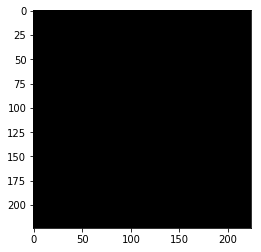

In [136]:
import matplotlib.pyplot as plt
sample = x[0][23]
sampleBlack = np.zeros(sample.shape)
plt.imshow(sample)

In [205]:
x[0].shape

(50, 224, 224, 3)

In [227]:
dataset = data.DataSet()
x,y = dataset.all_data('train')
import h5py
with h5py.File('h5test.h5', 'w') as h5db:
    hdf5_sequences = h5db.create_dataset(name='x_train', data = x, 
                                                    maxshape=(None))
    

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [222]:
with h5py.File('h5test.h5', 'r') as h5db:
    x2 = h5db['x_train'][:]

In [224]:
x2.shape

(10, 50, 224, 224, 3)

In [228]:
x.shape

(10,)